In [243]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pandas import read_csv

In [244]:
filename="df1.csv"
f=open(filename,encoding='UTF-8')
data=read_csv(f)
df = pd.DataFrame(data)

In [245]:
# 目的：分析湖北省 1-25 ～ 3-18 的疫情数据

# 内容
# 1：人数统计（确诊 死亡 治愈）；  
# 2：变化统计（确诊 死亡 治愈）；
# 3：变化率统计（确诊 死亡 治愈）；
# 4：死亡率 和 治愈率；

In [246]:
df.shape

(65, 6)

In [247]:
df = df.drop(df.columns[0],axis=1)
df.head()

,provinceName,province_confirmedCount,province_curedCount,province_deadCount,updateTime
0,湖北省,730,32,39,2020-01-25
1,湖北省,1058,42,52,2020-01-26
2,湖北省,1423,47,76,2020-01-27
3,湖北省,2714,52,100,2020-01-28
4,湖北省,3554,87,125,2020-01-29


In [248]:
time=np.arange(len(df))

#num
confirmNum = df.iloc[:,1]
curedNum = df.iloc[:,2]
deadNum = df.iloc[:,3]

# 治愈率 死亡率
deadRate = deadNum/confirmNum*100
curedRate = curedNum/confirmNum*100


In [249]:
# 计算增量
def calculate_Vary(column):
    Vary = pd.Series()
    j=0
    for i in df.iloc[:,column]:
        if i>=1:
            Vary = Vary.append(pd.Series(i-j),ignore_index=True)
        j=i
    return Vary

In [273]:
# 计算变化率
def calculate_VaryRate(Vary,is_confirm=0):
    # 最值差：
    maxNum = 0
    minNum = 0
    for i in Vary:
        if maxNum == 0:
            maxNum = i   
        elif maxNum <= i:
            if is_confirm:
                if i<10000:
                    maxNum = i
            else:
                maxNum = i
                
    for i in Vary:
        if minNum == 0:
            minNum = i
        elif minNum >= i:
            minNum = i
    maxVary = maxNum - minNum
    # 每天的变化率
    VaryRate = pd.Series()
    j=0
    for i in Vary:
        if i>=1:
            VaryRate = VaryRate.append(pd.Series((i-j)/maxVary),ignore_index=True)
        j=i
    return VaryRate

In [264]:
# 变化量
confirmVary = calculate_Vary(1)
curedVary = calculate_Vary(2)
deadVary = calculate_Vary(3)

In [274]:
# 变化率
confirm_varyRate = calculate_VaryRate(confirmVary,1)
cured_varyRate = calculate_VaryRate(curedVary)
dead_varyRate = calculate_VaryRate(deadVary)

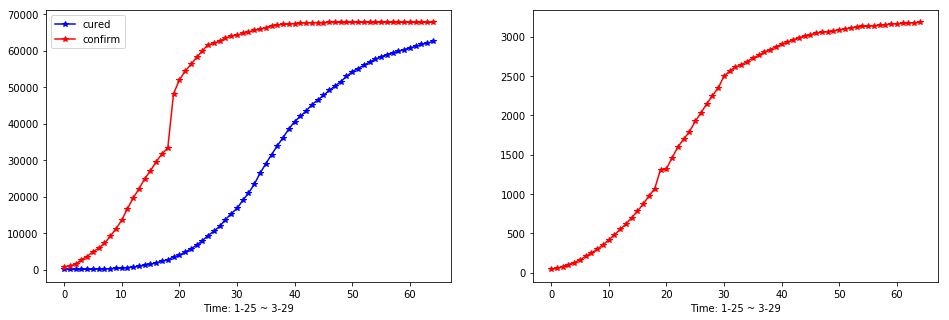

In [253]:
# 人数统计（确诊 治愈 死亡）
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.plot(time,curedNum,"b*-",label='cured')
plt.plot(time,confirmNum,"r*-",label='confirm')
plt.legend(loc=2)
plt.subplot(122)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.plot(time,deadNum,"r*-",label='dead')
plt.show()

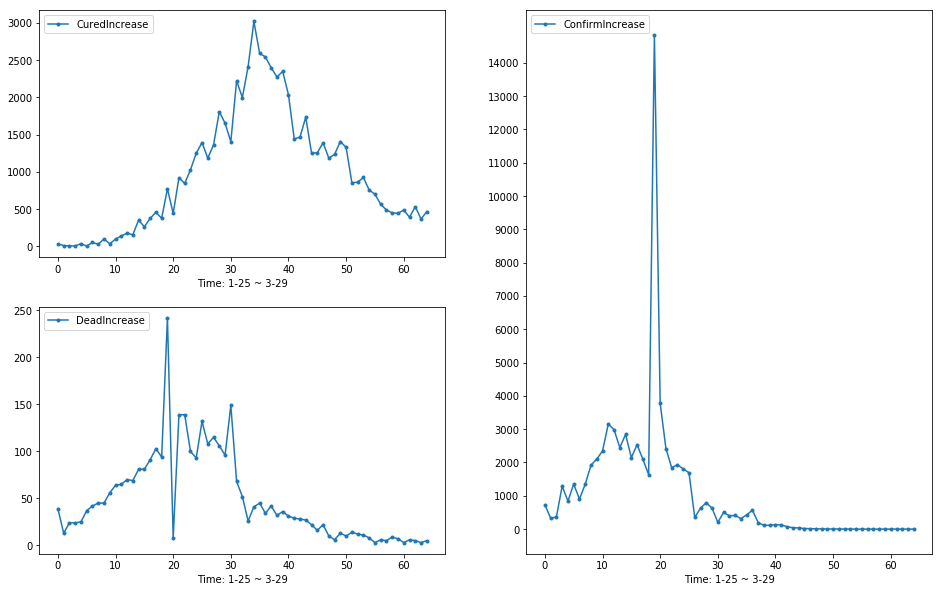

In [254]:
# 增长统计（确证 治愈 死亡）
plt.figure(figsize=(16,10))

plt.subplot(122)
plt.xlabel('Time: 1-25 ~ 3-29')
my_y_ticks = np.arange(0, 15000, 1000)      #显示范围，每200显示一刻度
plt.yticks(my_y_ticks)
plt.plot(confirmVary[:],'.-',label='ConfirmIncrease')
plt.legend(loc=2)

plt.subplot(221)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.plot(curedVary[:],'.-',label='CuredIncrease')
plt.legend(loc=2)

plt.subplot(223)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.plot(deadVary[:],'.-',label='DeadIncrease')
plt.legend(loc=2)

# width = 0.4
# plt.bar(deadVary.index-width,deadVary[:],width,color='red',label='DeadIncrease')
# plt.bar(curedVary.index,curedVary[:],width,label='CuredIncrease')

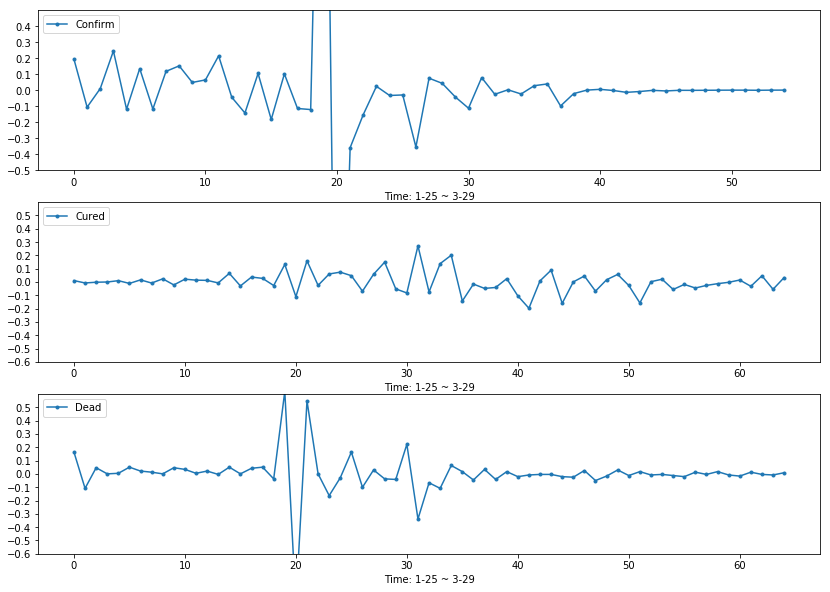

In [277]:
# 增长率统计（确证 治愈 死亡）
plt.figure(figsize=(14,10))

plt.subplot(311)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.ylim(-0.5,0.5)
my_y_ticks = np.arange(-0.5,0.5,0.1)  # 刻度
plt.yticks(my_y_ticks)
plt.plot(confirm_varyRate[:],'.-',label='Confirm')
plt.legend(loc=2)

plt.subplot(312)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.ylim(-0.6,0.6)
my_y_ticks = np.arange(-0.6,0.6,0.1)  # 刻度
plt.yticks(my_y_ticks)
plt.plot(cured_varyRate[:],'.-',label='Cured')
plt.legend(loc=2)

plt.subplot(313)
plt.xlabel('Time: 1-25 ~ 3-29')
plt.ylim(-0.6,0.6)
my_y_ticks = np.arange(-0.6,0.6,0.1)  #刻度
plt.yticks(my_y_ticks)
plt.plot(dead_varyRate[:],'.-',label='Dead')
plt.legend(loc=2)

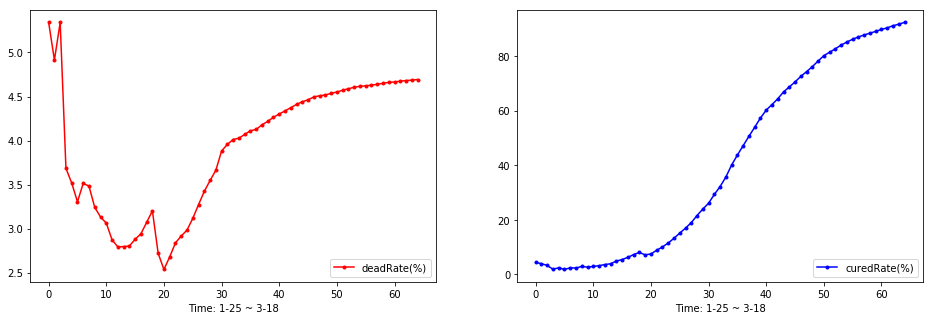

In [256]:
# 死亡率 治愈率
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.xlabel('Time: 1-25 ~ 3-18')
plt.plot(time,deadRate,"r.-",label='deadRate(%)')
plt.legend(loc=4)

plt.subplot(122)
plt.xlabel('Time: 1-25 ~ 3-18')
plt.plot(time,curedRate,"b.-",label='curedRate(%)')
plt.legend(loc=4)